In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 4]


# Graphique
Le module matplotlib est utile pour afficher des grapqhiques. Lorsqu'on cherche à compdrendre un ensemble de données en 1 ou 2 dimensions, il est utiles de les afficher. Voici 3 différentes fonctions d'affichage:

- plt.hist()
- plt.plot()
- plt.scatter()


et 3 différents types de données. Utiliser la méthode d'affichage approprié pour afficher chaque type de donnée, afficher le titre du graphique et nommez les axes. Expliquer pourquoi vous avez choisi cette fonction.

### Code à compléter
Produisez un graphique par cellule.

Text(0, 0.5, 'Y')

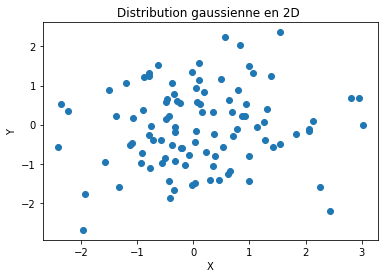

In [2]:
# Échantillon d'une distirubtion Gaussienne 2D
XY=np.random.multivariate_normal(np.array([0,0]),np.identity(2),size=100)
x,y = zip(*XY)

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('''Distribution gaussienne en 2D ''')
ax.set_xlabel('X')
ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

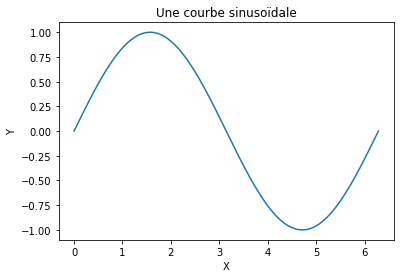

In [3]:
# Une courbe sinusoïdale
X=np.linspace(0,2*np.pi,1000)
Y=np.sin(X)
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set_title('Une courbe sinusoïdale')
ax.set_xlabel('X')
ax.set_ylabel('Y')

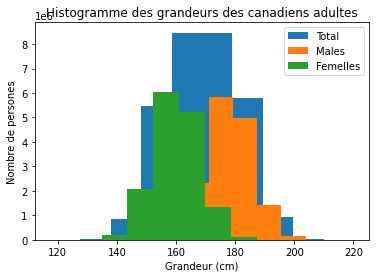

In [4]:
# Grandeur des canadiens adultes (synthétique)
X_male=np.random.normal(178,7.5,15000000)
X_female=np.random.normal(160,7.5,15000000)
X=np.concatenate((X_male,X_female))
X=X[X>0]

fig, ax = plt.subplots()
ax.hist(X)
ax.hist(X_male)
ax.hist(X_female)
ax.set_title('Histogramme des grandeurs des canadiens adultes')
ax.set_xlabel('Grandeur (cm)')
ax.set_ylabel('Nombre de persones')
ax.legend(['Total', 'Males', 'Femelles'])

### Explication

 1. **Échantillon d'une distirubtion Gaussienne 2D** : On a choisi la fonction `scatter()`. Ceci nous permet de voir la distrubution de nos données sur un plan 2D. On pourrait voir ceci comme une distribution de points, et la fonction `scatter()` nous permet de voir l'emplacement de ces points.

 2. **Une courbe sinusoïdale** : On a choisi la fonciton `plot()` car la fonction sinusoidale est typiquement affiché sur un graphique cartésien, dont $Y$ est l'axe vertical et $X$ est l'axe horizontal. C'est exactement le fonctionement par défaut de `plot()`.

 3. **Grandeur des canadiens adultes (synthétique)** : On a décidé d'utiliser la fonction `hist()` car nous voulons visualiser l'apparition des grandeurs des canadiens. 


# Lecture, affichages et sauvegarde d'images

Cette section contient quelques échantillons de code démontrant des maniuplations de bases des images à l'aide d'openCV. Lire et exécuter le code puis répondre aux questions plus bas.

Ici on montre deux méthodes d'affichage d'image, deux images sont affichées avec plt et une avec cv2. (Vous devez fermer la nouvelle fenêtre d'image pour continuer l'exécution du programme.)

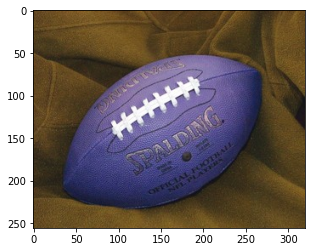

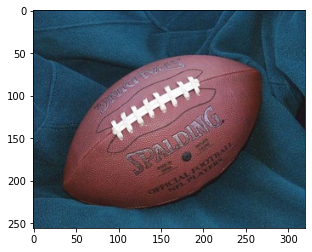

numpy.ndarray

In [5]:
img = cv2.imread('./images_et_fichier/football.jpg')
plt.imshow(img)
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows() 

type(img)

Lecture d'une image en niveau de gris avec cv2.IMREAD_GRAYSCALE », un "ImreadFlags".
https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html

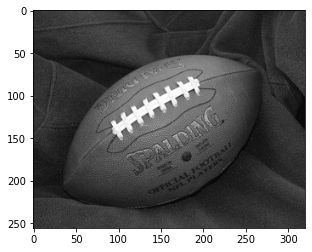

In [6]:
gray_img = cv2.imread('./images_et_fichier/football.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img,cmap='gray')
plt.show()

Enregistrement d'une image

In [7]:
cv2.imwrite('./images_et_fichier/output.jpg', gray_img);

### Questions
1.  *Donner le type de la variable «img».*
2.  *Décrivez les fonctions « imread , waitKey».*
3.  *Nommez 2 différences entre « cv2.imshow » et « plt.imshow »*
4. *Pourquoi un des ballons est violet?*
4. *Comment faire pour changer le format de l’image enregistrée ? Donner la commande complète pour sauvegarder l’image en format PNG. (Indice : utiliser les « ImwriteFlags »)*

### Réponses
1. `numpy.ndarray` (Tableau multidimensionel)
2.  
    1. `imread` : Lit une image d'un fichier et retourne l'image en format tableau numpy. `imread` peut prendre en parametre un drapeau pour specifier le mode de lecture de l'image (ex.: `IMREAD_COLOR`,  `IMREAD_GRAYSCALE`)
    2. `waitKey` : Ceci est une fonction bloquante. Elle attend que l'utilisateur pèse une touche. `waitKey` peut aussi prendre en paramètre un delai (en millisecondes). Si $delai \leq 0$ `waitKey` va attendre indéfinitivement pour que l'utilisateur pèse une touche.
3. 
    1. `plt.imshow` a plusieur parametres facultatifs que `cv2` n'a pas. Par exmple, `plt` nous permet de change l'opacité de l'image avec le parametre `alpha` 
    2. Avec `plt` on peut aussi changer l'origine de l'image. Typiquement, l'origine est situé au coin en haut, à gauche. Avec le parametre `origin`, on peut déplacer ce point.
4. OpenCV fait le traitement d'images couleur en format BGR. MatPlotLib, par contre, fait le traitement en RGB. Puisque OpenCV est utilisé pour la lecture de l'image et ensuite PLT est utilisé l'affichage, les canaux rouge et bleu sont inversés. <br> PLT est ensuite utilisé une deuxieme fois pour afficher la même image, mais cette fois-ci, la fonction `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` est appelé. Cele-ci convertit les images BGR en format RGB. C'est pour cela que l'image apparait correctement la deuxième fois. 
5. `cv2.imwrite('./images_et_fichier/output.png', gray_img)`

# Transformations géométriques

OpenCV offre deux fonctions pour faire des transformations sur les images cv2.warpAffine et cv2.warpPerspective.  cv2.warpAffine prend une matrice de transformation de dimension 2x3 comme entrée alors que cv.warpPerspective prend une matrice de dimension 3x3.  Créer un programme qui positionne le ballon de football de l’image « football.jpg » à la verticale (visuellement) et affiche le résultat.
(https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html)


### Code à écrire

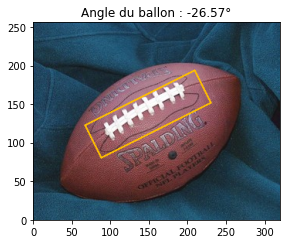

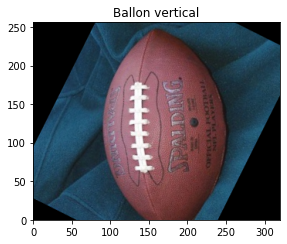

In [8]:
gray_img = cv2.imread('./images_et_fichier/football.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('./images_et_fichier/football.jpg' )
rows,cols, _ = img.shape
_, _, red_ch = cv2.split(img)

# Detection d'un contour qui décrit l'angle du ballon
edges_canny = cv2.Canny(red_ch, 90, 255) 

contours, hierarchy = cv2.findContours(edges_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cnt = contours[0]   

# Calcul de l'angle du ballon
rect = cv2.minAreaRect(cnt)
(x1,y1), (x2,y2), angle = rect

box = cv2.boxPoints(rect)
box = np.int0(box)

img_copy = img.copy()
cv2.drawContours(img_copy,[box],0,(0,191,255),2)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB), extent=[0,cols,0,rows])
plt.title(f"Angle du ballon : {angle:.2f}°")
plt.show()

#Calcul de la matrice de rotation pour positioner le ballon verticalement
height, width = img.shape[:2]
center = (width/2, height/2)

rot_mat = cv2.getRotationMatrix2D(center, 90+angle, 1.0)
result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB), extent=[0,cols,0,rows])
plt.title(f"Ballon vertical")
plt.show()



# Détection des contours
Dans cette section vous devrez comparer les résultats de deux algorithmes de détection de contours sur la même image. Créer un programme qui extrait le contour de « footballs.jpg » avec les deux algorithmes mentionnés plus bas, les affiche et décrire brièvement les étapes de chaque algorithmes.

Algorithme de Canny
(https://docs.opencv.org/master/da/d22/tutorial_py_canny.html)

Algorithme de Sobel
(https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html)

### Code à écrire

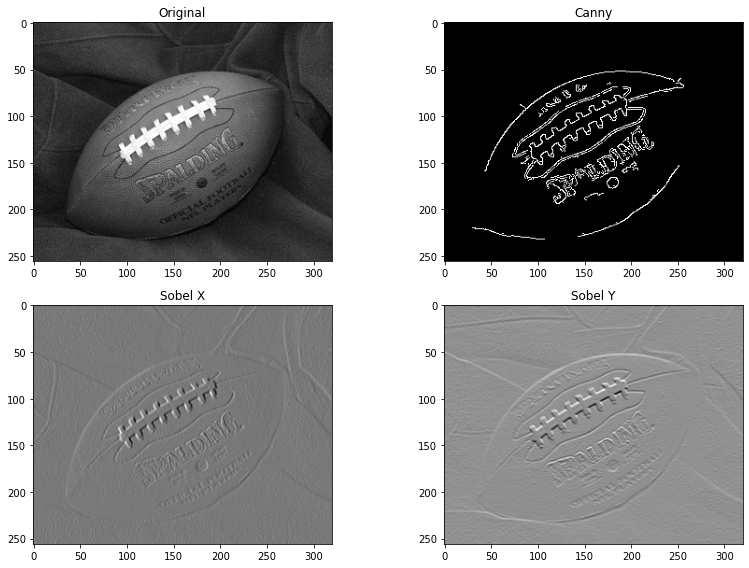

In [9]:
img = cv2.imread('./images_et_fichier/football.jpg', cv2.IMREAD_GRAYSCALE)

edges_canny = cv2.Canny(img, 95, 255) 

sobelx = cv2.Sobel(img,cv2.CV_32F  ,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_32F ,0,1,ksize=3)

plt.rcParams['figure.figsize'] = [12, 8]

plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(edges_canny,cmap = 'gray')
plt.title('Canny')

plt.subplot(2,2,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y');

### Réponse

#### Canny

1. **Lissage** : Un filtre gaussien de taille 5x5 est appliqué sur l'image pour réduire le bruit
2. **Calcul** du gradiant sur l'image filtré. En utilisant la convolution, avec un noyeau Sobel, on obtient la dérivé en X (Sobel X) et en Y (Sobel Y). Nous pouvons ensuite calculer la magnitude et l'angle de chaque pixels.
3.  **Eliminer les non-maximums** : A partir de la magnitude et phase, on parcour chaque pixels et on verifie les pixels voisins (dans la direction de l'angle) pour voir si ce pixel est un maximum local. 
4. **Seuillage** :  On garde les pixels d'ont la magintude est entre minVal et maxVal

#### Sobel

En utilisant la convolution, ces matrices sont appliquées sur l'image d'entree, pour obtenir deux images. Une image qui correspond au gradient en X, et une autre image qui correspond au grandient en Y.

$$noyeau_x = \begin{bmatrix}-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}$$

$$noyeau_y = \begin{bmatrix}-1 &-2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}$$

# Détection et suivit des visages
Utilisez un des lien plus bas (au choix) pour vous informer sur l’algorithme viola-Jones. Ensuite, utilisez le code fourni pour encadrer et détecter les visages de l’images « group.jpg ». Finalement répondre à la question.

Article Viola-Jones : (https://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf)

Tutoriel : (https://levelup.gitconnected.com/face-detection-with-python-using-opencv-5c27e521c19a)


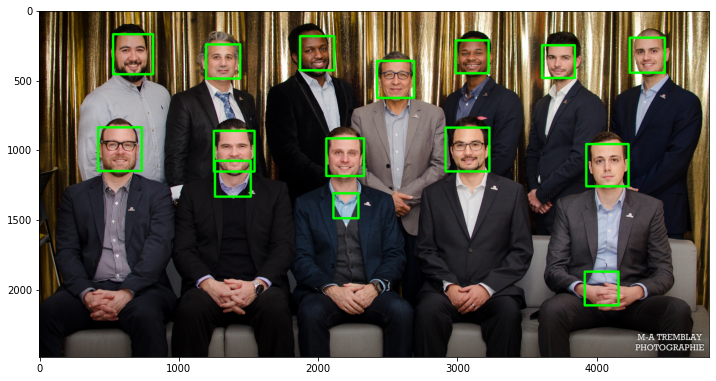

In [17]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
haar_cascade_face = cv2.CascadeClassifier('./images_et_fichier/haarcascade_frontalface_alt2.xml')


#  Loading the image to be tested

def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy
 
#  Loading the image to be tested
test_image = cv2.imread('./images_et_fichier/group.jpg')
    
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image)

#convert to RGB and display image
plt.imshow(convertToRGB(faces));

### Question
*Qu’est-ce qu’une image intégrale? En quoi est-ce utile?*

### Réponse

Dans l'algorithme Viola-Jones, on doit effectuer plusieurs sommes sur des fenêtres qui glissent sur l'image. Ceci est très couteux pour la performance. L'image intégrale est un truc qui contourne ce problème.

Pour calculer une image intégrale, on parcour chaque pixels de l'image. A chaque pixel, on fait la somme de tout les pixels à gauche et en haut. Ceci est très utile car pour calculer la somme de valeurs dans une fenetre, on peut facilement la trouver à partir des valeurs au coins de la fenêtre (dans l'image integrale).  

# Extraction des caractéristiques locales 
Commencer par lire la documentation sur les point-clé SIFT : (https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) 

Ensuite exécutez le code plus bas. Celui-ci extrait les point-clés de deux images et affiche une correspondance visuelle entre les points-clés des deux images. Vous devez écrire un algorithme, basé sur le script en exemple, qui estime la translation (en pixel) entre le livre de l’image 1 et celui de l’image 2. Le programme doit imprimer la translation à la fin. La qualité de la solution est évalué.

•	Expliquer votre solution

Conseils :
1.	Chaque objet KeyPoint contient sa position dans le champ pt
2.	Les lignes vertes présentes sur l’image généré représentent visuellement les match approuvé contenu dans la liste « matches »
3.	Chaque objet Dmatch contient un match de point-clé entre img1 et img2. Le champ queryIdx contient l’index du point-clé dans l’img1 et le champ trainIdx contient l’index du point-clé dans l’img2.
4.	On peut avoir la translation du match k1-k2 en faisant « trans=k2.pt-k1.pt »
5.	Ce ne sont pas tous les matchs qui sont utiles pour calculer la translation, on s’intéresse uniquement aux point-clés sur le livre.


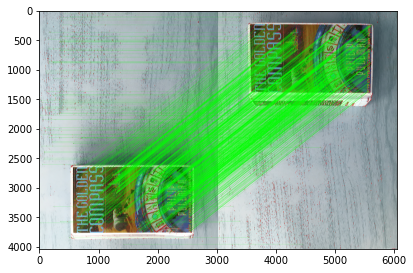

(<matplotlib.image.AxesImage at 0x25c5eec7f10>, None)

In [23]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]
img1 = cv2.imread('./images_et_fichier/livre1.jpg')
img2 = cv2.imread('./images_et_fichier/livre2.jpg')
gray_img1 = cv2.imread('./images_et_fichier/livre1.jpg' , cv2.IMREAD_GRAYSCALE) 
gray_img2 = cv2.imread('./images_et_fichier/livre2.jpg', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#Le champ .pt des object KeyPoint contiennent la position du point-cle

img1=cv2.drawKeypoints(img1,kp1,None)
img2=cv2.drawKeypoints(img2,kp2,None)
cv2.imwrite('./images_et_fichier/sift_keypoints1.jpg',img1)
cv2.imwrite('./images_et_fichier/sift_keypoints2.jpg',img2)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

#knnMatch retourne les 2 plus proche voisin pour chaque membre de des1
matches = flann.knnMatch(des1,des2,k=2)
#Les objects DMatch contiennent index de du point-cle de ds1 match dans le champ queryIdx
#et l'index du point-cle appartenant a des2 dans le champ trainIdx

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]


# ratio test as per Lowe's paper,
good = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

### Code à écrire

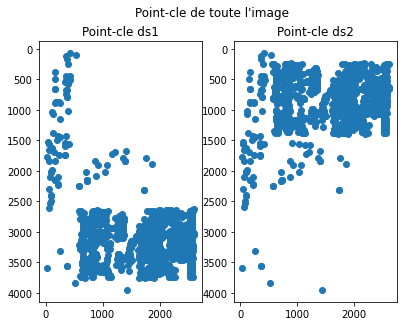

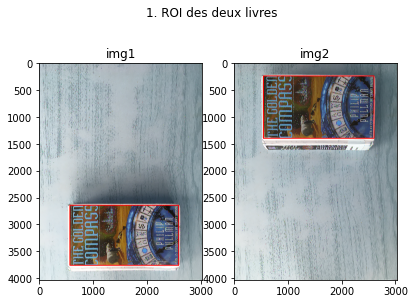

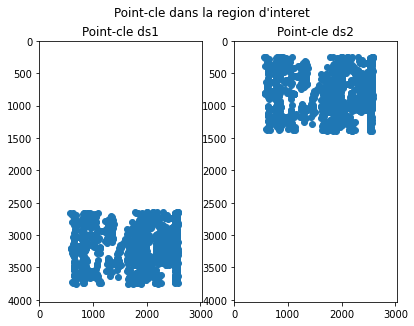

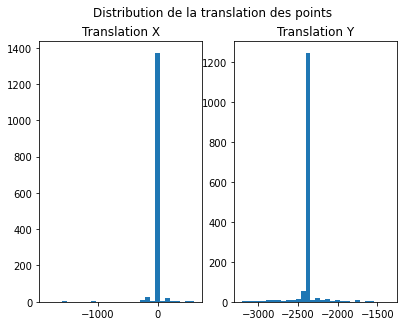

Le vecteur de translation est : [-17.95100417443731, -2381.4519885541968]


In [25]:
img1_pts = np.float32([ kp1[m.queryIdx].pt for m in good ])
img2_pts = np.float32([ kp2[m.trainIdx].pt for m in good ])

plt.subplot(1, 2, 1)
x,y = zip(*img1_pts)
plt.scatter(x,y)
plt.title("Point-cle ds1")
plt.gca().invert_yaxis()
plt.subplot(1, 2, 2)
x,y = zip(*img2_pts)
plt.scatter(x,y)
plt.title("Point-cle ds2")
plt.gca().invert_yaxis()
plt.suptitle("Point-cle de toute l'image")
plt.show()


gray_img1 = cv2.imread('./images_et_fichier/livre1.jpg' , cv2.IMREAD_GRAYSCALE) 
gray_img2 = cv2.imread('./images_et_fichier/livre2.jpg', cv2.IMREAD_GRAYSCALE)


''' 1 .Trouver la region d'interet (Le livre) dans les 2 images  '''
# Image 1
ret, thresh = cv2.threshold(gray_img1, 90, 120, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cnt = contours[1]  # Les contours sont trié. contours[0] = contour exterieur. contours[1] = deuxieme plus grand contour.

x,y,w,h = cv2.boundingRect(cnt)
(x1_1,y1_1), (x2_1,y2_1) = (x,y) , (x+ w,y+h)

cv2.rectangle(img1, (x1_1,y1_1), (x2_1,y2_1), (255, 0, 0), 15)
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("img1")

#Image 2
ret, thresh = cv2.threshold(gray_img2, 90, 120, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cnt = contours[1]

x,y,w,h = cv2.boundingRect(cnt)
(x1_2,y1_2), (x2_2,y2_2) = (x,y) , (x+ w,y+h)

cv2.rectangle(img2, (x1_2,y1_2), (x2_2,y2_2), (255, 0, 0), 15)
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("img2")
plt.suptitle("1. ROI des deux livres"), plt.show()

''' 2. Determiner quel points qui se trouvent dans les deux rectangles '''
img1_pts = []
img2_pts = []

translations_x = []
translations_y = []

for m in good:

    if  (x1_1 < kp1[m.queryIdx].pt[0]  < x2_1) and (y1_1 < kp1[m.queryIdx].pt[1]  < y2_1):
        if  (x1_2 < kp2[m.trainIdx].pt[0]  < x2_2) and (y1_2 < kp2[m.trainIdx].pt[1]  < y2_2):
            
            img1_pts.append(kp1[m.queryIdx].pt)
            img2_pts.append(kp2[m.trainIdx].pt)
            '''  3. Trouver la translation entre ces points  '''
            translations_x.append( kp2[m.trainIdx].pt[0] - kp1[m.queryIdx].pt[0])
            translations_y.append( kp2[m.trainIdx].pt[1] - kp1[m.queryIdx].pt[1])


plt.subplot(1, 2, 1)
x,y = zip(*img1_pts)
plt.scatter(x,y)
plt.title("Point-cle ds1")
plt.xlim([0,gray_img1.shape[1]])
plt.ylim([0,gray_img1.shape[0]])
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
x,y = zip(*img2_pts)
plt.scatter(x,y)
plt.title("Point-cle ds2")
plt.xlim([0,gray_img2.shape[1]])
plt.ylim([0,gray_img2.shape[0]])
plt.gca().invert_yaxis()

plt.suptitle("Point-cle dans la region d'interet")
plt.show()

plt.subplot(1, 2, 1)
plt.hist(translations_x, bins=30) 
plt.title('Translation X')
plt.subplot(1, 2, 2)
plt.hist(translations_y, bins=30)
plt.title('Translation Y')
plt.suptitle("Distribution de la translation des points")
plt.show()

print(f"Le vecteur de translation est : [{np.mean(translations_x)}, {np.mean(translations_y)}]")



### Explication

1. La première chose que nous faisons, c'est de trouver la région d'interet dans les deux images. C'est a dire, la région ou le livre est situé. Nous faisons ceci avec la la fonction `findContours` et `boundingRect` pour obtenir les coordonnées des regions.
2. Ensuite, nous determinons quels points clés sont situés dans les contours.
3. Nous trouvons ensuite la translation en X et Y pour les points clés correspontants que nous avons gardé à l'étape 2. Nous sauvegardons la translation entre chaque points dans une liste .
4. Nous calculons la moyenne de la liste de translations.

